# GRIP : The Sparks Foundation

### Data Science and Business Analytics Intern

### Author : Nimma Shravan Kumar Reddy

### Task 1 : Prediction using Supervised ML 

#### In this task we have to predict the percentage of an student based on the number of study hours. The task has two variables where the feature is the number of study hours and target value is the percentage score. This problem can be solved using simple linear regression.

In [ ]:
# importing required libraries 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Reading data from Remote url

In [ ]:
url ="http://bit.ly/w-data"
data = pd.read_csv(url)

#### Exploratory Data Analysis

In [62]:
data.head() # getting first 5 rows

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [63]:
data.shape   #(rows, columns)

(25, 2)

In [64]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [65]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
Hours     25 non-null float64
Scores    25 non-null int64
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


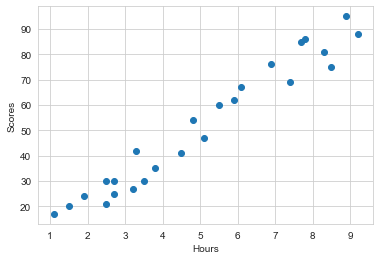

In [66]:
plt.scatter(data['Hours'],data['Scores'])
plt.xlabel("Hours")
plt.ylabel("Scores")
plt.show()

In [67]:
data.corr(method='pearson') # Finding linear relationship

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


In [68]:
data.corr(method='spearman')

,Hours,Scores
Hours,1.000000,0.971891
Scores,0.971891,1.000000


In [69]:
Hours = data.Hours
Scores = data.Scores

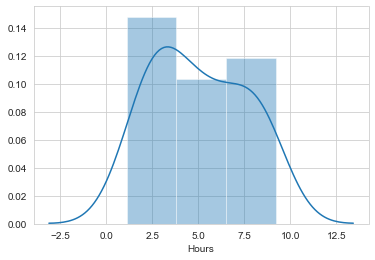

In [70]:
sns.distplot(Hours)

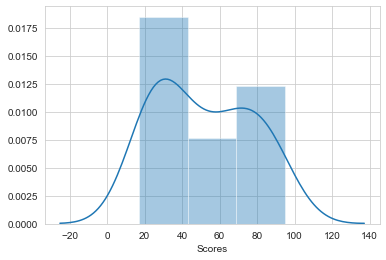

In [71]:
sns.distplot(Scores)

### Linear Regression 

In [72]:
x = data.iloc[:,:-1].values
y = data.iloc[:,1].values

In [124]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(x,y, test_size=0.2, random_state=55)

In [125]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

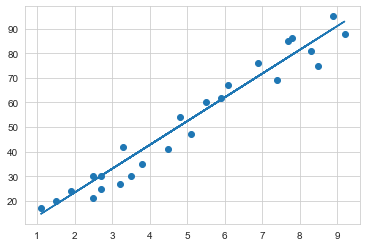

In [126]:
m = lr.coef_
c = lr.intercept_
line = m*x + c
plt.scatter(x,y)
plt.plot(x,line)
plt.show()

In [127]:
y_pred = lr.predict(X_test)

In [128]:
predicted_target = pd.DataFrame({'Predicted':y_pred,'Target':Y_test}) # Acutal(target) vs predicted
predicted_target

,Predicted,Target
0,92.912110,88
1,37.882296,30
2,61.052744,62
3,30.158813,25
4,34.985990,27


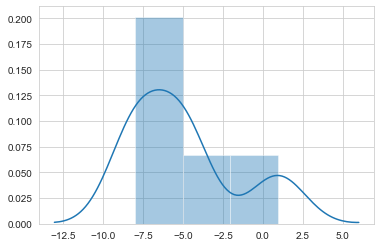

In [129]:
sns.set_style('whitegrid')
sns.distplot(np.array(Y_test-y_pred))
plt.show()

#### Predicted score if a student studies for 9.25 hours/day

In [130]:
score = lr.predict([[9.25]])
print("Predicted percentage score of a student who studies for 9.25 hours/day is : ",score)

Predicted percentage score of a student who studies for 9.25 hours/day is :  [93.39482742]


### Model Evaluation  

In [131]:
from sklearn import metrics
from sklearn.metrics import r2_score
print("Mean Absolute Error: ",metrics.mean_absolute_error(Y_test,y_pred) )
print("R2 Score : ",r2_score(Y_test,y_pred))

Mean Absolute Error:  5.3772929998060865
R2 Score :  0.942302712048589
